# **EDSA - Sendy Logistics Challenge**

by **EXPLORE Data Science Academy**

Linear regression sprint

##   Project overview:

Sendy, in partnership with insight2impact facility, is hosting a Zindi challenge to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination.

The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

Data is a critical component in helping Sendy to build more efficient, affordable and accessible solutions. Given the details of a Sendy order, use historic data to predict a time for the arrival of the rider at the destination of a package. Build a model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers.

##  Data:

The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform.

*Datasets:*

*   Train.csv - is the dataset that you will use to train your model.
*   Test.csv - is the dataset on which you will apply your model to.
*   Riders.csv - contains unique rider Ids, number of orders, age, rating and   number of ratings.
*   VariableDefinitions.csv - Definitions of variables in the Train, Test and Riders files



###   Variables:

**Order details**
*   Order No – Unique number identifying the order
*   User Id – Unique number identifying the customer on a platform
*   Vehicle Type – For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans
*   Platform Type – Platform used to place the order, there are 4 types
*   Personal or Business – Customer type

**Placement times**
*   Placement - Day of Month i.e 1-31
*   Placement - Weekday (Monday = 1)
*   Placement - Time - Time of day the order was placed

**Confirmation times**
*   Confirmation - Day of Month i.e 1-31
*   Confirmation - Weekday (Monday = 1)
*   Confirmation - Time - time of day the order was confirmed by a rider

**Arrival at Pickup times**
*   Arrival at Pickup - Day of Month i.e 1-31
*   Arrival at Pickup - Weekday (Monday = 1)
*   Arrival at Pickup - Time - Time of day the rider arrived at the location to *   pick up the order - as marked by the rider through the Sendy application

**Pickup times**
*   Pickup - Day of Month i.e 1-31
*   Pickup - Weekday (Monday = 1)
*   Pickup - Time - Time of day the rider picked up the order - as marked by the rider through the Sendy application

**Arrival at Destination times** *(column missing in Test set)*
*   Arrival at Delivery - Day of Month i.e 1-31
*   Arrival at Delivery - Weekday (Monday = 1)
*   Arrival at Delivery - Time - Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application
*   Distance covered (KM) - The distance from Pickup to Destination
*   Temperature -Temperature at the time of order placement in Degrees Celsius (measured every three hours)
*   Precipitation in Millimeters - Precipitation at the time of order placement (measured every three hours)
*   Pickup Latitude and Longitude - Latitude and longitude of pick up location
*   Destination Latitude and Longitude - Latitude and longitude of delivery location
*   Rider ID – ID of the Rider who accepted the order
*   Time from Pickup to Arrival - Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ - calculated from the columns for the purpose of facilitating the task

**Rider metrics**
*   Rider ID – Unique number identifying the rider (same as in order details)
*   No of Orders – Number of Orders the rider has delivered
*   Age – Number of days since the rider delivered the first order
*   Average Rating – Average rating of the rider
*   No of Ratings - Number of ratings the rider has received. Rating an order is optional for the customer.

##  Imports:

In [2]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, cross_val_score, validation_curve, train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

C:\Users\mrsen\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##  Data Loading:

In [3]:
# load the data from CSV file into pandas DataFrames

train_df = pd.read_csv('https://raw.githubusercontent.com/Kaekaefx/Group5_Gather_Predict/master/database_tables_csv/Data/Train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Kaekaefx/Group5_Gather_Predict/master/database_tables_csv/Data/Test.csv')
riders_df = pd.read_csv('https://raw.githubusercontent.com/Kaekaefx/Group5_Gather_Predict/master/database_tables_csv/Data/Riders.csv')
sample_submission_df = pd.read_csv('https://raw.githubusercontent.com/Kaekaefx/Group5_Gather_Predict/master/database_tables_csv/Data/SampleSubmission.csv')
variable_def_df = pd.read_csv('https://raw.githubusercontent.com/Kaekaefx/Group5_Gather_Predict/master/database_tables_csv/Data/VariableDefinitions.csv')

In [4]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


##   Data Preprocessing:

*  ###   Exploratory Data Analysis

In [6]:
# print the shape
print("train_df {}\ntest_df {}\nriders_df {}".format(train_df.shape, test_df.shape, riders_df.shape))

train_df (21201, 29)
test_df (7068, 25)
riders_df (960, 5)


In [7]:
# print column names
print("train_df: {}\ntest_df: {}\nriders_df: {}".format(train_df.columns, test_df.columns, riders_df.columns))

train_df: Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')
test_df: Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday

**Notes:**

*   We can join the Riders table to both the Train and Test tables of the 'Rider Id' column.
*   There are a few missing columns in the Test table.
*   The Train table seems to have column that contains the same values.

In [8]:
# join 'train_df' and 'riders_df' on 'Rider Id' column
raw_data = pd.merge(train_df, riders_df, on = 'Rider Id')

# join 'test_df' and 'riders_df' on 'Rider Id' column
test_df = pd.merge(test_df, riders_df, on = 'Rider Id')

In [9]:
# drop columns from 'test_df' that are not present in 'raw_data' since the Day of month and Weekday are duplicate and time cannot be reproduced
hold_y = raw_data['Time from Pickup to Arrival']
raw_data = raw_data.drop([col for col in raw_data.columns if col in raw_data.columns and col not in test_df.columns], axis=1)
raw_data['Time from Pickup to Arrival'] = hold_y

In [10]:
# get 'raw_data' info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              21201 non-null  object 
 1   User Id                               21201 non-null  object 
 2   Vehicle Type                          21201 non-null  object 
 3   Platform Type                         21201 non-null  int64  
 4   Personal or Business                  21201 non-null  object 
 5   Placement - Day of Month              21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)          21201 non-null  int64  
 7   Placement - Time                      21201 non-null  object 
 8   Confirmation - Day of Month           21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)       21201 non-null  int64  
 10  Confirmation - Time                   21201 non-null  object 
 11  Arrival at Pick

In [11]:
# get 'test_df' info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [12]:
# print the shape
print("raw_data {}\ntest_df {}".format(raw_data.shape, test_df.shape))

raw_data (21201, 30)
test_df (7068, 29)


In [13]:
# Ref: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
def duplicate_columns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [14]:
# print a list of columns that contain the same values from both 'raw_data' and 'test_df'
print("raw_data {}\ntest_df {}".format(duplicate_columns(raw_data), duplicate_columns(test_df)))

raw_data ['Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)']
test_df ['Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month']


In [15]:
# drop duplicate columns in both dfs
raw_data = raw_data.drop(['Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)'], axis = 1)
test_df = test_df.drop(['Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)'], axis = 1)

# print the shape
print("raw_data {}\ntest_df {}".format(raw_data.shape, test_df.shape))

raw_data (21201, 28)
test_df (7068, 27)




> **Missing values**



In [16]:
# investigate missing values
print("\n\nraw_data:\n{} \n\ntest_df:\n\n{}".format(raw_data.isnull().sum(), test_df.isnull().sum()))



raw_data:
Order No                               0
User Id                                0
Vehicle Type                           0
Platform Type                          0
Personal or Business                   0
Placement - Day of Month               0
Placement - Weekday (Mo = 1)           0
Placement - Time                       0
Confirmation - Day of Month            0
Confirmation - Weekday (Mo = 1)        0
Confirmation - Time                    0
Arrival at Pickup - Time               0
Pickup - Day of Month                  0
Pickup - Weekday (Mo = 1)              0
Pickup - Time                          0
Distance (KM)                          0
Temperature                         4366
Precipitation in millimeters       20649
Pickup Lat                             0
Pickup Long                            0
Destination Lat                        0
Destination Long                       0
Rider Id                               0
No_Of_Orders                           0
Age 

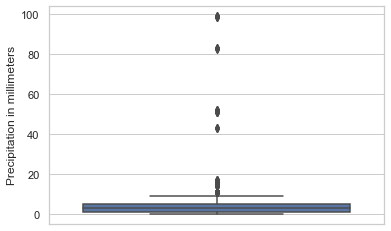

In [17]:
sns.set(style = "whitegrid")
ax = sns.boxplot(x = 'Precipitation in millimeters', data = raw_data, orient = "v")

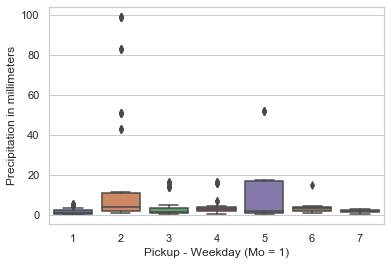

In [18]:
ax = sns.boxplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Precipitation in millimeters', data = raw_data, orient = "v")

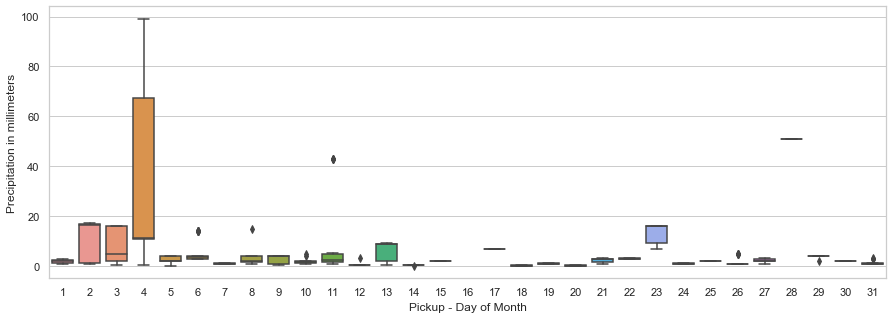

In [19]:
plt.figure(figsize = (15, 5))
ax = sns.boxplot(x = 'Pickup - Day of Month', y = 'Precipitation in millimeters', data = raw_data, orient = "v")

In [20]:
# check corelation between 'Temperature' and 'Precipitation in millimeters'r
raw_data['Precipitation in millimeters'].corr(raw_data['Temperature'])

-0.1813270569731928

**Notes:**


*   'Precipitation in millimeters' column has a lot of null values.
*   The distribution of the data is narrow.
*   Temprature and Precipitation in millimeters ha a negative correlation



In [21]:
# drop the 'Precipitation in millimeters' column in both dfs
raw_data = raw_data.drop(['Precipitation in millimeters'], axis = 1)
test_df = test_df.drop(['Precipitation in millimeters'], axis = 1)

# print the shape
print("raw_data {}\ntest_df {}".format(raw_data.shape, test_df.shape))

raw_data (21201, 27)
test_df (7068, 26)


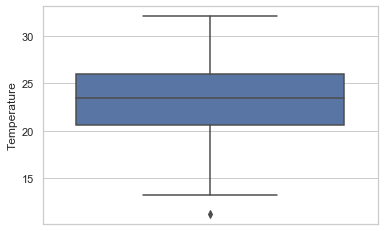

In [22]:
ax = sns.boxplot(x = 'Temperature', data = raw_data, orient = "v")

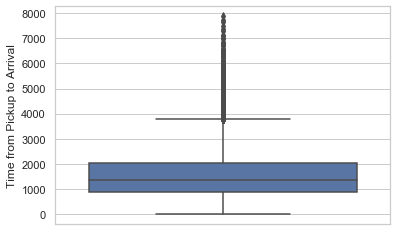

In [23]:
ax = sns.boxplot(x = 'Time from Pickup to Arrival', data = raw_data, orient = "v")

In [24]:
def remove_outlier(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    # interquartile range
    iqr = q3 - q1

    low_bound  = q1 - 1.5 * iqr
    high_bound = q3 + 1.5 * iqr
    df_out = df.loc[(df[column_name] > low_bound) & (df[column_name] < high_bound)]
    return df_out

In [25]:
# remove outliers from the Temperature column
raw_data = remove_outlier(raw_data, 'Temperature')

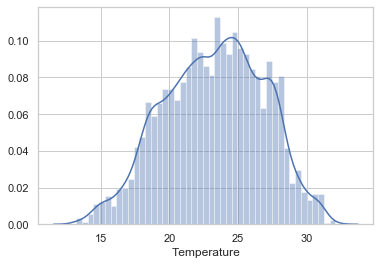

In [26]:
d = sns.distplot(raw_data['Temperature'])

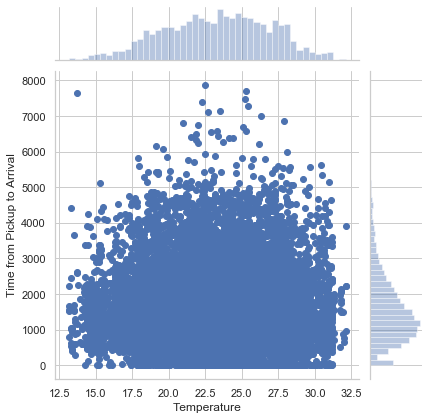

In [27]:
j = sns.jointplot(x = 'Temperature', y = 'Time from Pickup to Arrival', data = raw_data);

In [28]:
# replace NULL values in the 'Temperature' column with the 'mean' value
raw_data['Temperature'].fillna((raw_data['Temperature'].mean()), inplace = True)
test_df['Temperature'].fillna((test_df['Temperature'].mean()), inplace = True)

In [29]:
# investigate missing values
print("\n\nraw_data:\n{} \n\ntest_df:\n\n{}".format(raw_data.isnull().sum(), test_df.isnull().sum()))



raw_data:
Order No                           0
User Id                            0
Vehicle Type                       0
Platform Type                      0
Personal or Business               0
Placement - Day of Month           0
Placement - Weekday (Mo = 1)       0
Placement - Time                   0
Confirmation - Day of Month        0
Confirmation - Weekday (Mo = 1)    0
Confirmation - Time                0
Arrival at Pickup - Time           0
Pickup - Day of Month              0
Pickup - Weekday (Mo = 1)          0
Pickup - Time                      0
Distance (KM)                      0
Temperature                        0
Pickup Lat                         0
Pickup Long                        0
Destination Lat                    0
Destination Long                   0
Rider Id                           0
No_Of_Orders                       0
Age                                0
Average_Rating                     0
No_of_Ratings                      0
Time from Pickup to Arriva

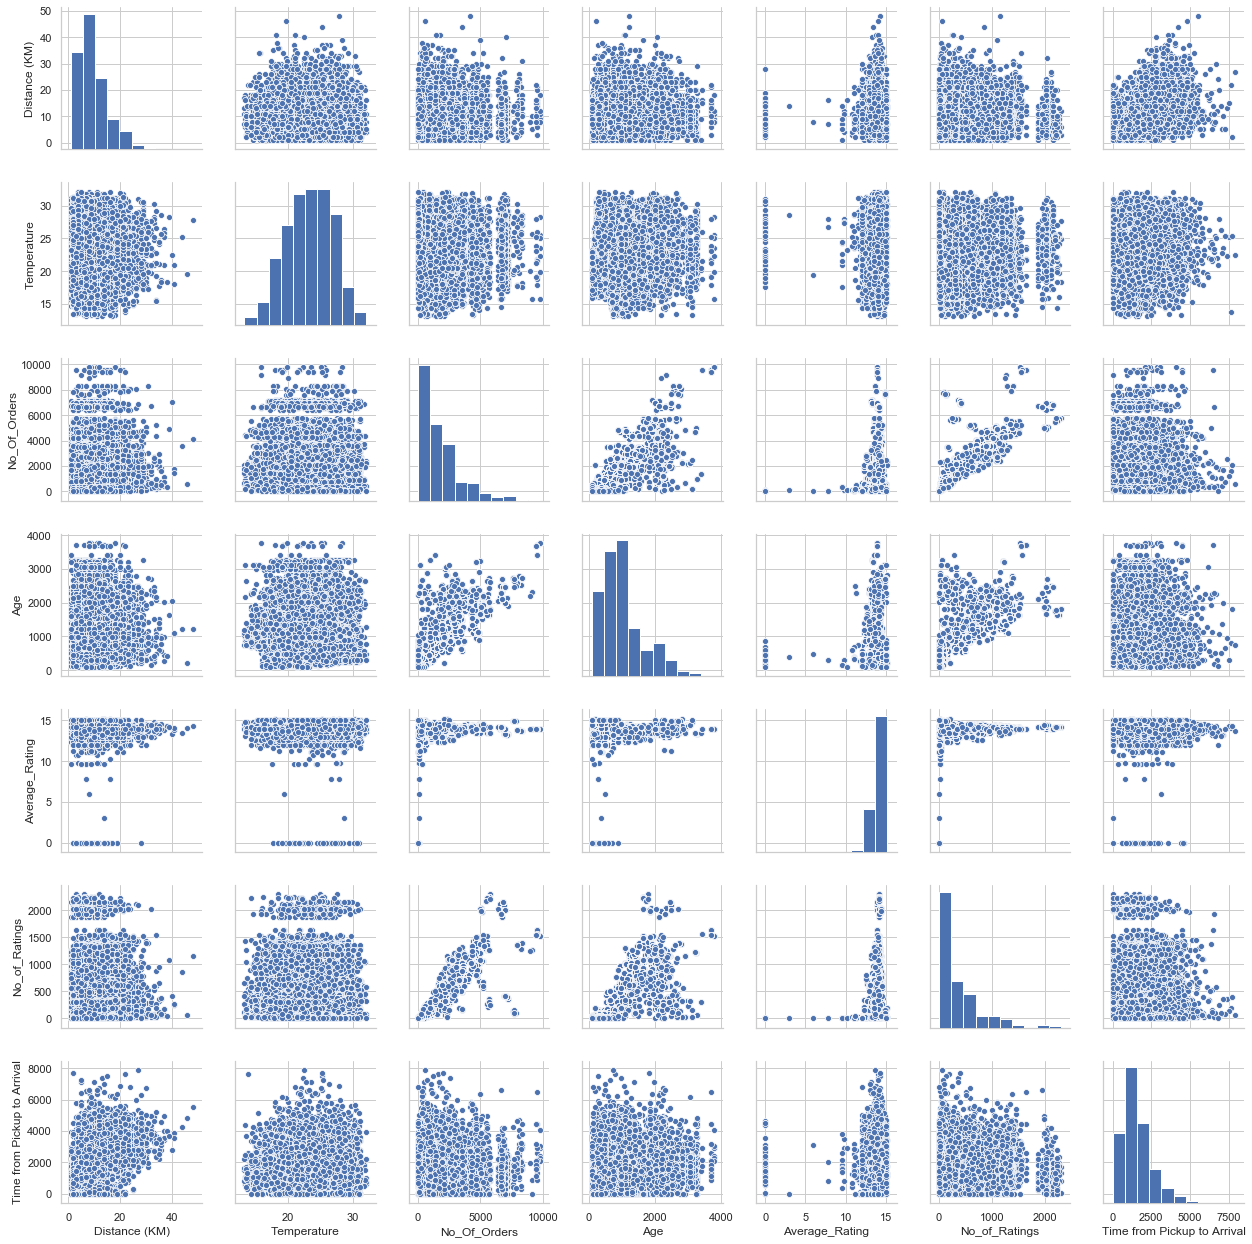

In [30]:
# visualize data
g = sns.pairplot(raw_data[['Distance (KM)', 'Temperature', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings', 'Time from Pickup to Arrival']])

C:\Users\mrsen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mrsen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


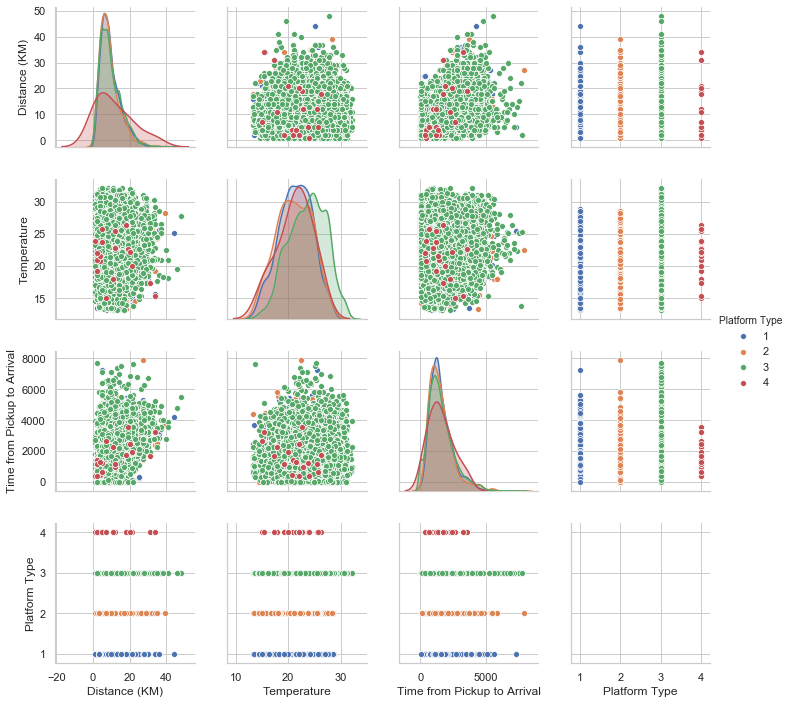

In [31]:
# visualize subset of data
g = sns.pairplot(raw_data[['Distance (KM)', 'Temperature', 'Time from Pickup to Arrival', 'Platform Type']], hue = 'Platform Type')

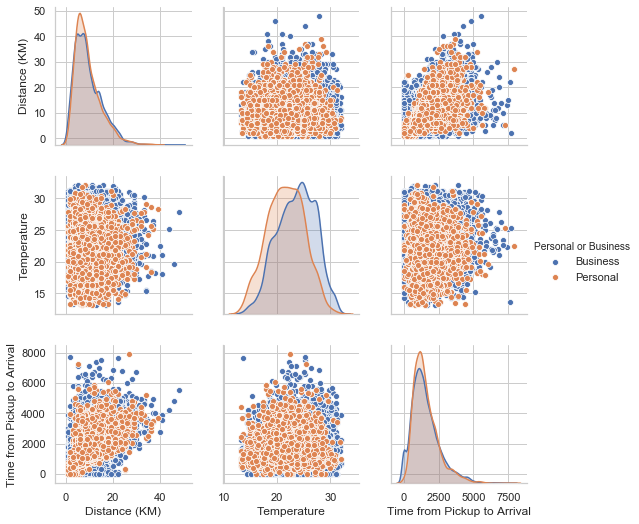

In [34]:
# visualize subset of data
g = sns.pairplot(raw_data[['Distance (KM)', 'Temperature', 'Time from Pickup to Arrival', 'Personal or Business']], hue = 'Personal or Business')

In [35]:
# investigate all the elements whithin each Feature 
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Order No :16834
The number of values for feature User Id :2937
The number of values for feature Vehicle Type :1 -- ['Bike']
The number of values for feature Platform Type :4 -- [1 2 3 4]
The number of values for feature Personal or Business :2 -- ['Business' 'Personal']
The number of values for feature Placement - Day of Month :31
The number of values for feature Placement - Weekday (Mo = 1) :7 -- [1 2 3 4 5 6 7]
The number of values for feature Placement - Time :13238
The number of values for feature Confirmation - Day of Month :31
The number of values for feature Confirmation - Weekday (Mo = 1) :7 -- [1 2 3 4 5 6 7]
The number of values for feature Confirmation - Time :13276
The number of values for feature Arrival at Pickup - Time :13229
The number of values for feature Pickup - Day of Month :31
The number of values for feature Pickup - Weekday (Mo = 1) :7 -- [1 2 3 4 5 6 7]
The number of values for feature Pickup - Time :13246
The number of values f

In [36]:
# drop the 'Vehicle Type' column
raw_data = raw_data.drop(['Vehicle Type'], axis = 1)
test_df = test_df.drop(['Vehicle Type'], axis = 1)

# drop Placement and Confirmation details
raw_data = raw_data.drop(['Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Placement - Time', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time'], axis = 1)
test_df = test_df.drop(['Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Placement - Time', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time'], axis = 1)

# print the shape
print("raw_data {}\ntest_df {}".format(raw_data.shape, test_df.shape))

raw_data (16834, 20)
test_df (7068, 19)


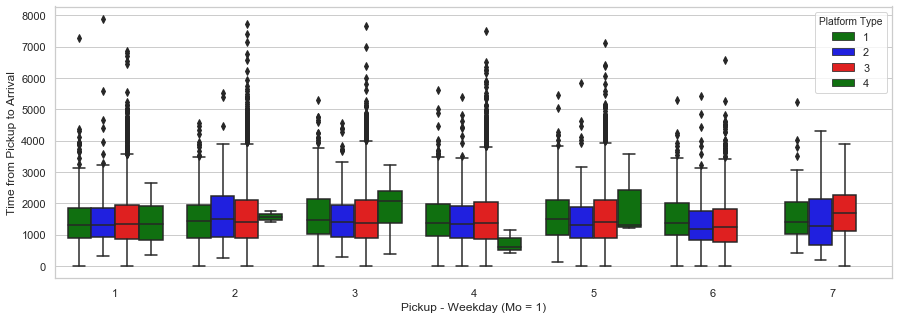

In [37]:
# investigate the distribution of Time from Pickup to Arrival by Categorical Variables

pal = ['green', 'blue','red']
plt.figure(figsize = (15, 5))
g = sns.boxplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Time from Pickup to Arrival', data = raw_data, hue = 'Platform Type', palette = pal)



> **Feature Engineering:**



In [38]:
# extract the 'AM' and 'PM' from the Pickup - Time
train_am_pm = [x.split(" ")[-1] for x in raw_data['Pickup - Time']]
test_am_pm = [x.split(" ")[-1] for x in test_df['Pickup - Time']]

# replace Pickup - Time with either 'AM' or 'PM'
raw_data['Pickup - Time'] = train_am_pm
test_df['Pickup - Time'] = test_am_pm

# extract the 'AM' and 'PM' from the Arrival at Pickup - Time
train_am_pm = [x.split(" ")[-1] for x in raw_data['Arrival at Pickup - Time']]
test_am_pm = [x.split(" ")[-1] for x in test_df['Arrival at Pickup - Time']]

# replace Arrival at Pickup - Time with either 'AM' or 'PM'
raw_data['Arrival at Pickup - Time'] = train_am_pm
test_df['Arrival at Pickup - Time'] = test_am_pm

raw_data.head()

,Order No,User Id,Platform Type,Personal or Business,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,3,Business,AM,9,5,AM,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745
1,Order_No_27440,User_Id_2642,3,Personal,PM,18,5,PM,20,24.5,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,1309,13.8,549,2886
2,Order_No_14170,User_Id_3339,3,Business,PM,31,5,PM,6,24.7,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,1309,13.8,549,2615
3,Order_No_21727,User_Id_3523,3,Personal,AM,2,2,AM,18,15.2,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,1309,13.8,549,2986
4,Order_No_8301,User_Id_87,2,Personal,AM,22,2,AM,7,19.2,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,1309,13.8,549,1602


In [39]:
# drop the Arrival at Pickup - Time column
raw_data = raw_data.drop(['Arrival at Pickup - Time'], axis = 1)
test_df = test_df.drop(['Arrival at Pickup - Time'], axis = 1)

# print a list of columns that contain the same values from both 'raw_data' and 'test_df'
print("raw_data {}\ntest_df {}".format(duplicate_columns(raw_data), duplicate_columns(test_df)))  

raw_data []
test_df []


In [40]:
# replace day no. with day name in Pickup - Weekday
day_dict = {1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
raw_data = raw_data.replace({'Pickup - Weekday (Mo = 1)': day_dict})
test_df = test_df.replace({'Pickup - Weekday (Mo = 1)': day_dict})

raw_data.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings',
       'Time from Pickup to Arrival'],
      dtype='object')

In [41]:
# imputation
raw_data = pd.get_dummies(raw_data, columns=['Pickup - Weekday (Mo = 1)'])
raw_data = pd.get_dummies(raw_data, columns=['Personal or Business'])
raw_data = pd.get_dummies(raw_data, columns=['Platform Type'])
raw_data = pd.get_dummies(raw_data, columns=['Pickup - Time'])

test_df = pd.get_dummies(test_df, columns=['Pickup - Weekday (Mo = 1)'])
test_df = pd.get_dummies(test_df, columns=['Personal or Business'])
test_df = pd.get_dummies(test_df, columns=['Platform Type'])
test_df = pd.get_dummies(test_df, columns=['Pickup - Time'])

raw_data.columns

Index(['Order No', 'User Id', 'Pickup - Day of Month', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Time from Pickup to Arrival',
       'Pickup - Weekday (Mo = 1)_Fri', 'Pickup - Weekday (Mo = 1)_Mon',
       'Pickup - Weekday (Mo = 1)_Sat', 'Pickup - Weekday (Mo = 1)_Sun',
       'Pickup - Weekday (Mo = 1)_Thurs', 'Pickup - Weekday (Mo = 1)_Tues',
       'Pickup - Weekday (Mo = 1)_Wed', 'Personal or Business_Business',
       'Personal or Business_Personal', 'Platform Type_1', 'Platform Type_2',
       'Platform Type_3', 'Platform Type_4', 'Pickup - Time_AM',
       'Pickup - Time_PM'],
      dtype='object')

In [42]:
# drop redundant columns to avoid the dummy variable trap
raw_data = raw_data.drop(['Pickup - Weekday (Mo = 1)_Sat', 'Platform Type_4', 'Pickup - Time_PM', 'Personal or Business_Personal'], axis = 1)
test_df = test_df.drop(['Pickup - Weekday (Mo = 1)_Sat', 'Platform Type_4', 'Pickup - Time_PM', 'Personal or Business_Personal'], axis = 1)

In [43]:
# print columns
print("raw_data:\n\n{}\ntest_df:\n\n{}".format(raw_data.columns, test_df.columns))

raw_data:

Index(['Order No', 'User Id', 'Pickup - Day of Month', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Time from Pickup to Arrival',
       'Pickup - Weekday (Mo = 1)_Fri', 'Pickup - Weekday (Mo = 1)_Mon',
       'Pickup - Weekday (Mo = 1)_Sun', 'Pickup - Weekday (Mo = 1)_Thurs',
       'Pickup - Weekday (Mo = 1)_Tues', 'Pickup - Weekday (Mo = 1)_Wed',
       'Personal or Business_Business', 'Platform Type_1', 'Platform Type_2',
       'Platform Type_3', 'Pickup - Time_AM'],
      dtype='object')
test_df:

Index(['Order No', 'User Id', 'Pickup - Day of Month', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Pickup - Weekday (Mo = 1)_Fri',
       'Pickup - Weekday (Mo = 1)_Mon', 'Pickup - Week



> **Feature Selection:**





> *  Correlation





In [44]:
# running correlation
hm = raw_data[['Pickup - Day of Month', 'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings', 'Time from Pickup to Arrival']].corr()

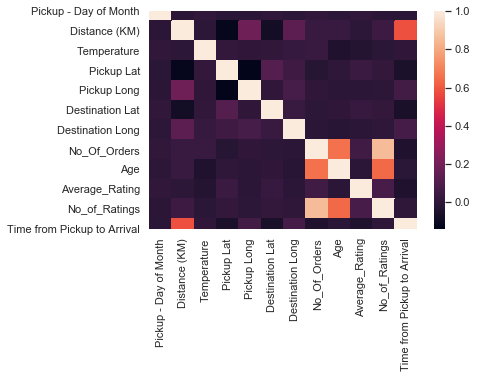

In [45]:
# visualizing correlation with a Heatmap
g = sns.heatmap(hm)



> **Train Test Split:**



In [46]:
# split the data into X & y
X = raw_data.drop(['Order No', 'User Id', 'Rider Id', 'Time from Pickup to Arrival'], axis = 1)
y = raw_data['Time from Pickup to Arrival']

In [47]:
# view X
X.head()

,Pickup - Day of Month,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,...,Pickup - Weekday (Mo = 1)_Mon,Pickup - Weekday (Mo = 1)_Sun,Pickup - Weekday (Mo = 1)_Thurs,Pickup - Weekday (Mo = 1)_Tues,Pickup - Weekday (Mo = 1)_Wed,Personal or Business_Business,Platform Type_1,Platform Type_2,Platform Type_3,Pickup - Time_AM
0,9,4,20.4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,...,0,0,0,0,0,1,0,0,1,1
1,18,20,24.5,-1.326774,36.787807,-1.356237,36.904295,1637,1309,13.8,...,0,0,0,0,0,0,0,0,1,0
2,31,6,24.7,-1.255189,36.782203,-1.273412,36.818206,1637,1309,13.8,...,0,0,0,0,0,1,0,0,1,0
3,2,18,15.2,-1.290315,36.757377,-1.223520,36.802061,1637,1309,13.8,...,0,0,0,1,0,0,0,0,1,1
4,22,7,19.2,-1.273524,36.799220,-1.300431,36.752427,1637,1309,13.8,...,0,0,0,1,0,0,0,1,0,1




> **Train Test Split:**



In [48]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [50]:
# scaling data
std = StandardScaler()
X_train_scaled = pd.DataFrame(std.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_val_scaled = pd.DataFrame(std.transform(X_val), columns = X_val.columns, index = X_val.index)
X_test_scaled = pd.DataFrame(std.transform(X_test), columns = X_test.columns, index = X_test.index)



> **Machine Learning:**



In [51]:
scoring = 'neg_mean_squared_error'



> Linear Regression




In [0]:
lr = LinearRegression()
scores = cross_val_score(lr, X_train_scaled, y_train, n_jobs = -1 , cv = 5, scoring = scoring)
print('RMSE: ', np.sqrt(-scores).mean())

RMSE:  796.7255265595406


In [0]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X_train_scaled.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lr.coef_) 

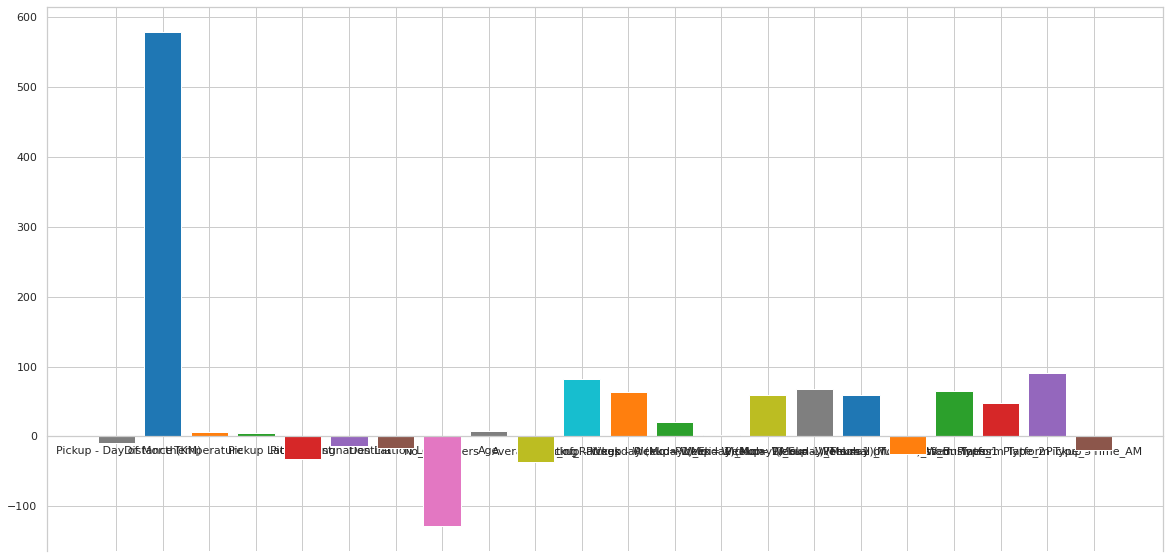

In [0]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lreg_coefficient["Columns"],  
lreg_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show()

In [0]:
# results on test
y_train_pred = lr.predict(X_train_scaled)
y_val_pred = lr.predict(X_val_scaled)
y_pred_lr = np.append(y_train_pred, y_val_pred)
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_val, y_val_pred)))

Train RMSE: 795.1799435662666
Test RMSE: 779.4232908108302




> **Random Forest**




In [52]:
er_str = {}

# experimenting with various cases of tree depth and max features at a node trying to find the optimum operation point and account for the bias vs variance trade off

for feat, dep in [(2,2),(5,4),(8,6),(9,9),(12,11)]:  
    
    gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = dep, max_features = feat,
                                    random_state = 100, learning_rate = 0.01, loss = 'ls')
    rf = RandomForestRegressor(n_estimators = 100, max_depth = dep, max_features = feat, random_state = 100)
    
    for model,name in [(gbr,'Gradient Boosting Regressor'),(rf,'Random Forest Regressor')]:
        
        model.fit(X_train_scaled, y_train) # Fitting both the models
        error = mean_squared_error(y_test, model.predict(std.transform(X_test))) # Calculating the MSE on test set
        er_str[(name,(feat,dep))] = round(error,2)
        #print "MSE for model %s is : %d" %(name,error)
        print('this completed %d' %(dep))
        
er_str.items()

this completed 2
this completed 2
this completed 4
this completed 4
this completed 6
this completed 6
this completed 9
this completed 9
this completed 11
this completed 11


dict_items([(('Gradient Boosting Regressor', (2, 2)), 898646.26), (('Random Forest Regressor', (2, 2)), 894916.25), (('Gradient Boosting Regressor', (5, 4)), 758405.0), (('Random Forest Regressor', (5, 4)), 715670.7), (('Gradient Boosting Regressor', (8, 6)), 695814.52), (('Random Forest Regressor', (8, 6)), 646904.02), (('Gradient Boosting Regressor', (9, 9)), 673110.14), (('Random Forest Regressor', (9, 9)), 623755.39), (('Gradient Boosting Regressor', (12, 11)), 671870.8), (('Random Forest Regressor', (12, 11)), 617870.87)])

In [55]:
# Final model selected 
rf = RandomForestRegressor(n_estimators = 100, max_depth = 12, max_features = 11, random_state = 100)
rf.fit(X_train_scaled, y_train) 

y_train_pred = rf.predict(X_train_scaled)
print(X_train_scaled.columns)
y_val_pred = rf.predict(X_val_scaled)
import pickle
save_path = 'sendy_regression.pkl'
pickle.dump(rf,open(save_path,'wb'))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_val, y_val_pred)))

Index(['Pickup - Day of Month', 'Distance (KM)', 'Temperature', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings',
       'Pickup - Weekday (Mo = 1)_Fri', 'Pickup - Weekday (Mo = 1)_Mon',
       'Pickup - Weekday (Mo = 1)_Sun', 'Pickup - Weekday (Mo = 1)_Thurs',
       'Pickup - Weekday (Mo = 1)_Tues', 'Pickup - Weekday (Mo = 1)_Wed',
       'Personal or Business_Business', 'Platform Type_1', 'Platform Type_2',
       'Platform Type_3', 'Pickup - Time_AM'],
      dtype='object')
Train RMSE: 561.4561215781415
Test RMSE: 747.4497957176021




> **Learning Curve**



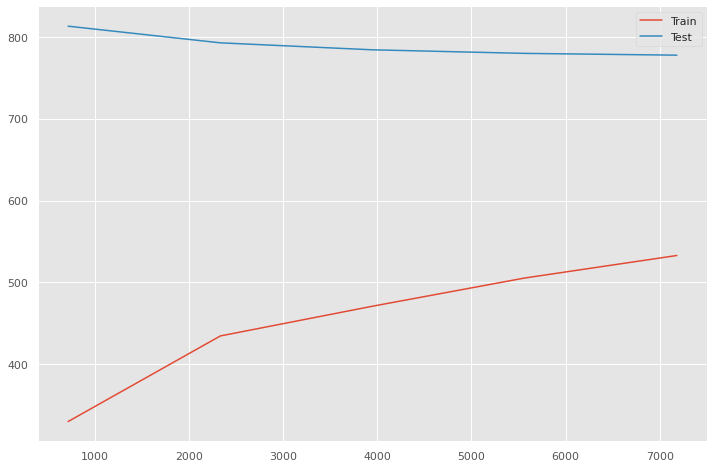

In [0]:
# plot the learning curve of the model
lc = learning_curve(rf, X_train_scaled, y_train, cv = 3, n_jobs = -1, scoring = scoring)
size = lc[0]
train_score = [-lc[1][i].mean() for i in range (0, 5)]
test_score = [-lc[2][i].mean() for i in range (0, 5)]
fig = plt.figure(figsize = (12,8))
plt.plot(size,np.sqrt(train_score), label = "Train")
plt.plot(size,np.sqrt(test_score), label = "Test")
plt.legend()

## Submission

In [0]:
#
test_ids = test_df['Order No']
X_t = test_df.drop(['Order No', 'User Id', 'Rider Id'], axis = 1)
X_t.head()

,Pickup - Day of Month,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Pickup - Weekday (Mo = 1)_Fri,Pickup - Weekday (Mo = 1)_Mon,Pickup - Weekday (Mo = 1)_Sun,Pickup - Weekday (Mo = 1)_Thurs,Pickup - Weekday (Mo = 1)_Tues,Pickup - Weekday (Mo = 1)_Wed,Personal or Business_Business,Platform Type_1,Platform Type_2,Platform Type_3,Pickup - Time_AM
2,29,9,19.7,-1.255189,36.782203,-1.293393,36.790237,439,1511,13.3,171,1,0,0,0,0,0,1,0,0,1,0
3,2,15,16.4,-1.310451,36.868724,-1.259542,36.787118,439,1511,13.3,171,0,1,0,0,0,0,1,0,0,1,1
4,14,15,21.3,-1.333275,36.870815,-1.255189,36.782203,439,1511,13.3,171,0,0,0,1,0,0,1,0,0,1,0
5,30,7,20.3,-1.333275,36.870815,-1.331806,36.835960,439,1511,13.3,171,0,0,0,1,0,0,1,0,0,1,0
6,11,7,23.0,-1.308407,36.834501,-1.332454,36.883519,439,1511,13.3,171,0,1,0,0,0,0,0,1,0,0,0


In [0]:
# scale X_t
X_t_scaled = pd.DataFrame(std.fit_transform(X_t), columns = X_t.columns, index = X_t.index)

In [0]:
# predict test
y_t_pred = rf.predict(X_t_scaled)

In [0]:
# submit file
submission = pd.DataFrame(index = test_ids)
submission['Order No'] = list(map(int, y_t_pred))

submission.to_csv('SampleSubmission.csv')